# `       BUSINESS CASE: WALMART- CONFIDENCE INTERVAL& CLT       `

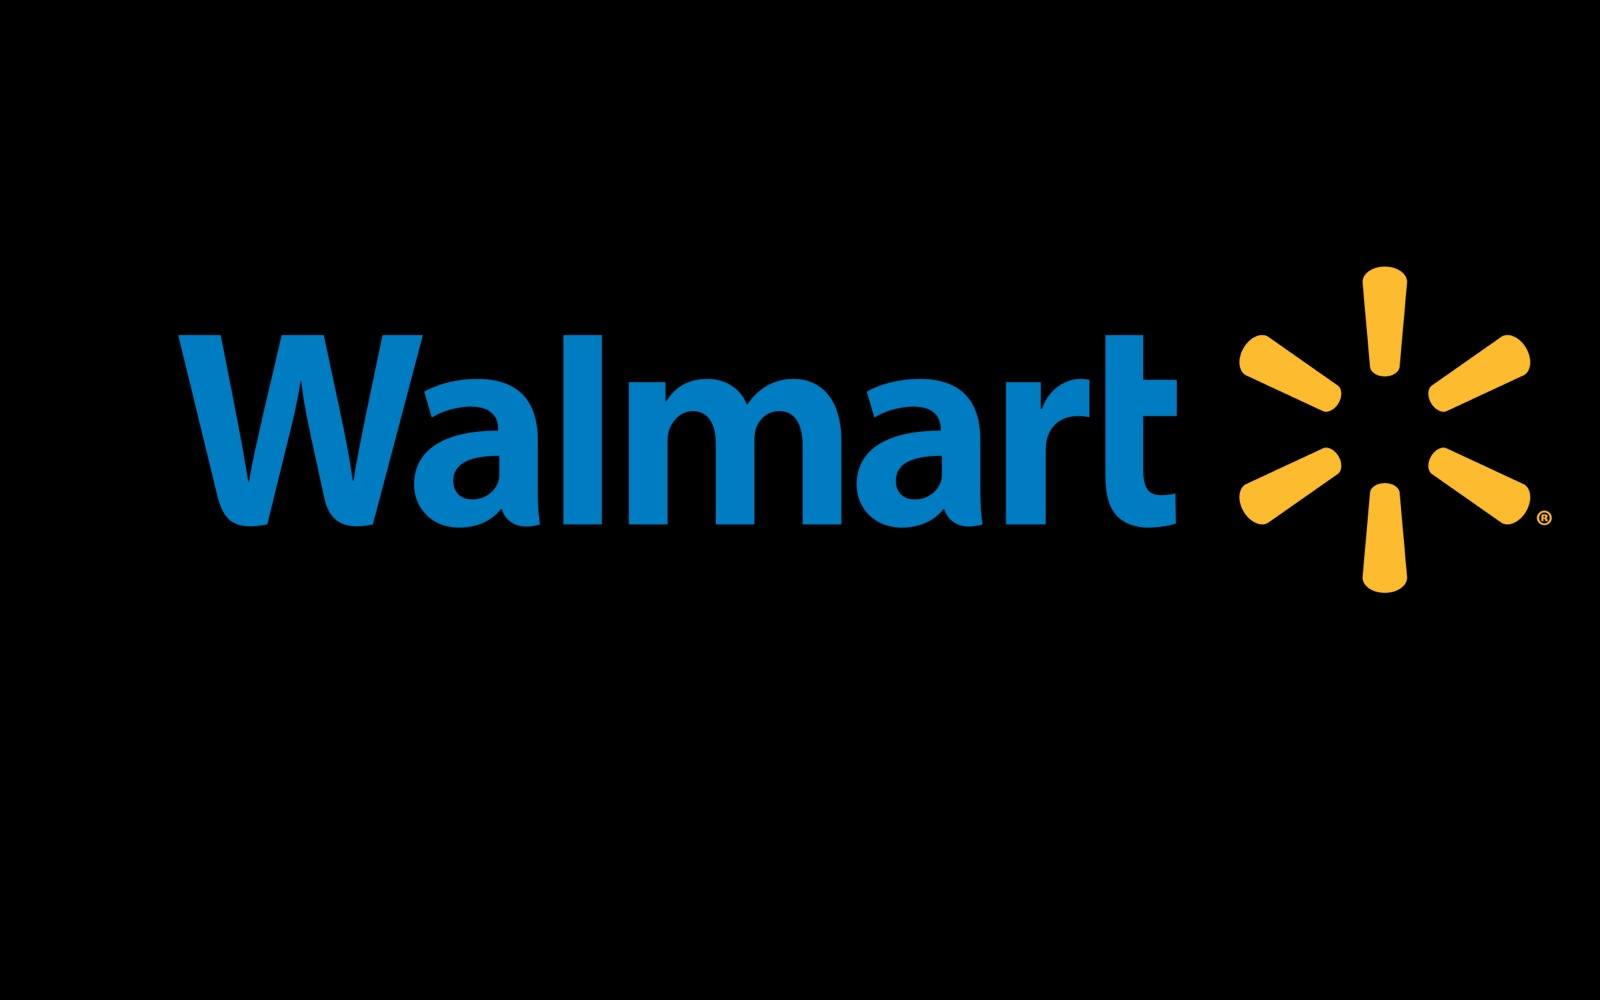

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
from scipy.stats import norm
import statistics as stat
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =  pd.read_csv('walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
print('Shape of the dataset:',df.shape)
print('Columns in the dataset:',df.columns)

Shape of the dataset: (550068, 10)
Columns in the dataset: Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
df.User_ID.nunique()

5891

In [7]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [8]:
df.isna().sum()/100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

In [9]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

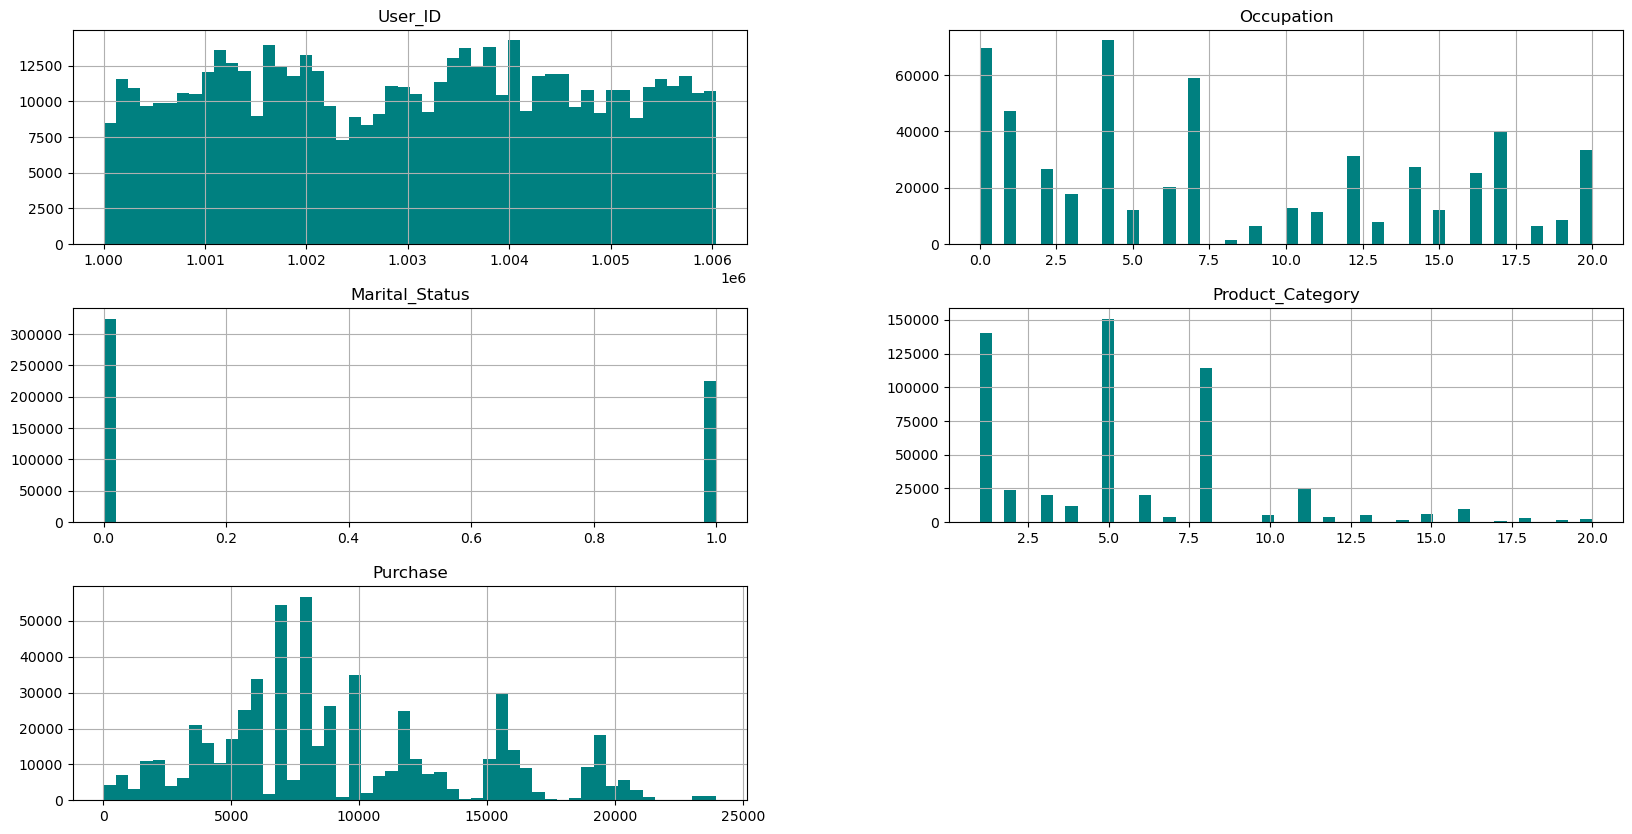

In [10]:
df.hist(bins=50,color='teal',figsize=(20,10))
plt.show()

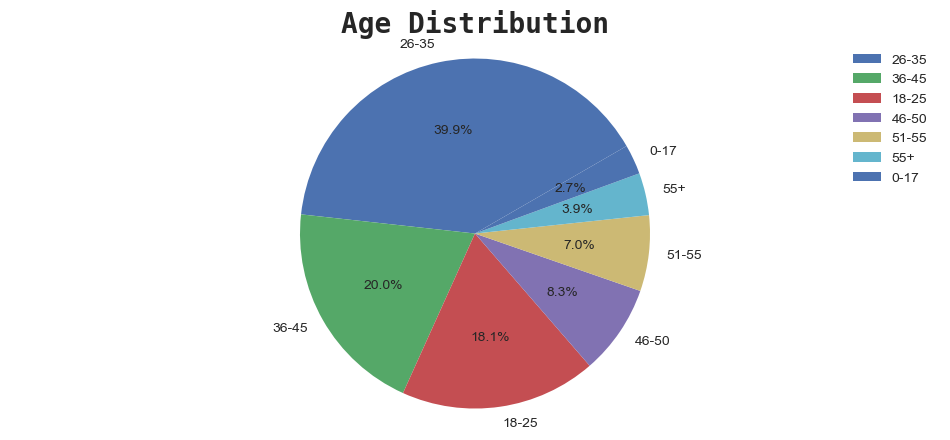

In [93]:
age = df['Age'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize = (12, 5))
plt.pie(age.values, labels = age.index, startangle = 30, autopct = '%1.1f%%')
plt.title('Age Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' :20, 'fontweight' : 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

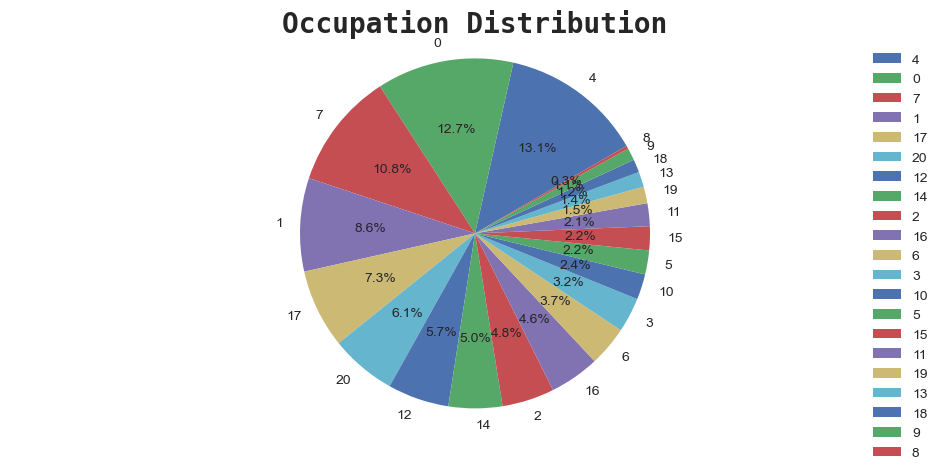

In [100]:
occupation = df['Occupation'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize = (12, 5))
plt.pie(occupation.values, labels = occupation.index, startangle = 30, autopct = '%1.1f%%')
plt.title('Occupation Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' :20, 'fontweight' : 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

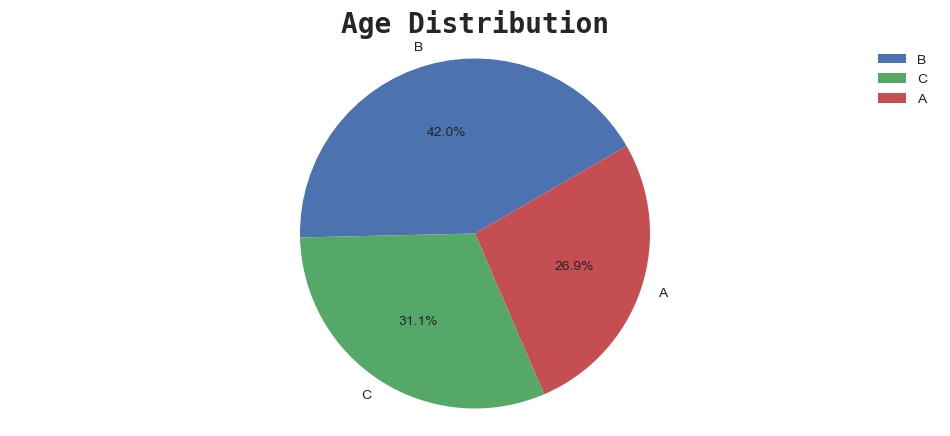

In [95]:
city = df['City_Category'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize = (12, 5))
plt.pie(city.values, labels = city.index, startangle = 30, autopct = '%1.1f%%')
plt.title('City Categories Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' :20, 'fontweight' : 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

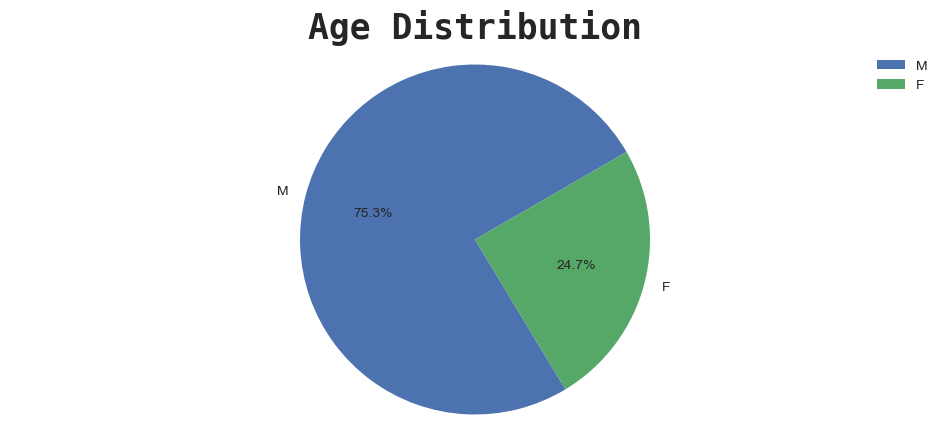

In [96]:
gender = df['Gender'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize = (12, 5))
plt.pie(gender.values, labels = gender.index, startangle = 30, autopct = '%1.1f%%')
plt.title('Gender Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' :25 , 'fontweight' : 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

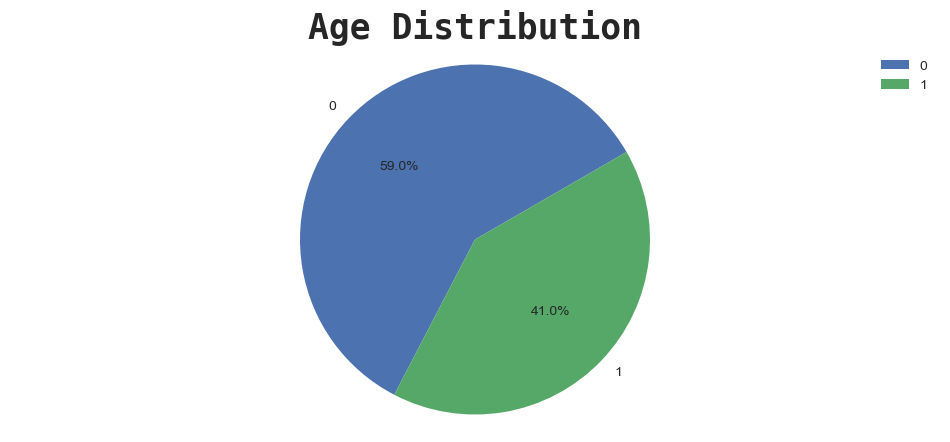

In [97]:
status = df['Marital_Status'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize = (12, 5))
plt.pie(status.values, labels = status.index, startangle = 30, autopct = '%1.1f%%')
plt.title('Marital Status Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' :25 , 'fontweight' : 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

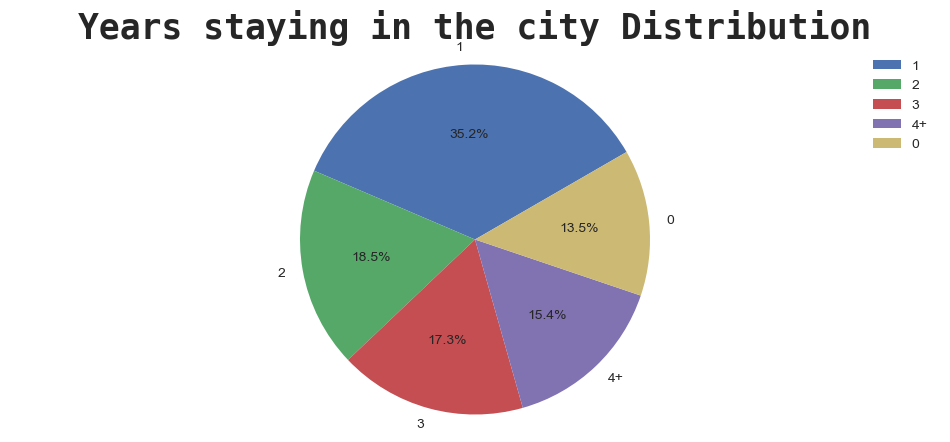

In [99]:
years = df['Stay_In_Current_City_Years'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize = (12, 5))
plt.pie(years.values, labels = years.index, startangle = 30, autopct = '%1.1f%%')
plt.title('Years staying in the city Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' :25 , 'fontweight' : 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

#### `Observations from EDA:`

* There are 5891 unique IDs in the dataset and 3631 unique product IDs.
* Outliers can only be seen in Purchases Column.
* Approximately 40% of individuals fall within the age bracket of 26-35, while 19% and 18% of the population are in the 36-45 and 18-25 age groups, respectively.
* Occupations 4, 0, and 7 collectively account for 36% of the population, while Occupation 8 represents less than 1% of the total population.
* City Category in the dataset are as follows: A- 26%, B-42% and C- 31%.
* About 75% of the poulation are Male and the rest is Female.
* 59.3% of the population is not married.
* There are no null values in the data.
* 42% of the city category belongs to B, 31% belongs to C and 26% of the population belongs to A city category.

# `                               DATA ANALYSIS                                         `

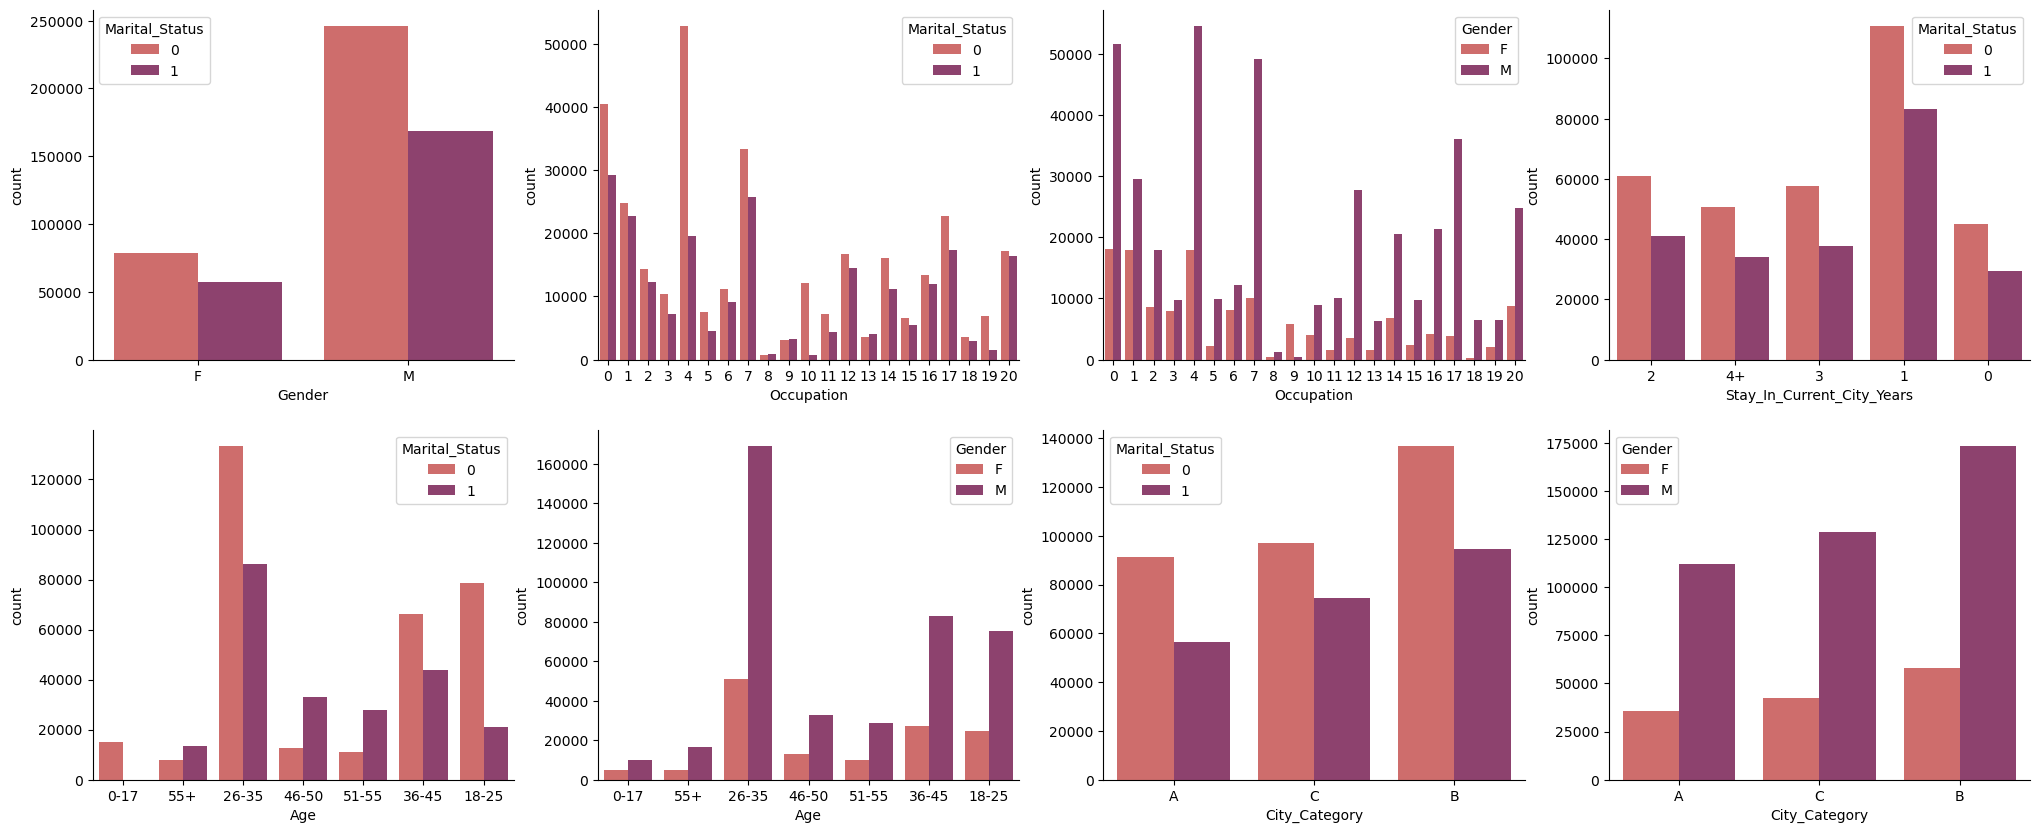

In [17]:
plt.figure(figsize=(25,10))
plt.subplot(2,4,1)
sns.countplot(x=df['Gender'],hue=df['Marital_Status'],palette='flare')
plt.subplot(2,4,2)
sns.countplot(x=df['Occupation'],hue=df['Marital_Status'],palette='flare')
plt.subplot(2,4,3)
sns.countplot(x=df['Occupation'],hue=df['Gender'],palette='flare')
plt.subplot(2,4,4)
sns.countplot(x=df['Stay_In_Current_City_Years'],hue=df['Marital_Status'],palette='flare')
plt.subplot(2,4,5)
sns.countplot(x=df['Age'],hue=df['Marital_Status'],palette='flare')
plt.subplot(2,4,6)
sns.countplot(x=df['Age'],hue=df['Gender'],palette='flare')
plt.subplot(2,4,7)
sns.countplot(x=df['City_Category'],hue=df['Marital_Status'],palette='flare')
plt.subplot(2,4,8)
sns.countplot(x=df['City_Category'],hue=df['Gender'],palette='flare')
sns.despine()
plt.show()

In [18]:
pd.crosstab(df['Gender'],df['Marital_Status'],margins=True)

Marital_Status,0,1,All
Gender,,,
F,78821,56988,135809
M,245910,168349,414259
All,324731,225337,550068


`Observations/ Insights:`
* As 24% of the population belongs to women, 58% of them are single and out of 76% of male 59% of them are married.
* Population in Occupation 4, 1, 0 & 7 comprises 33.8% of the Males and 37.4% of Females.
* As 24% of the population belongs to women, 58% of them are single and out of 76% of male 59% of them are married.
* Population in Occupation 4, 1, 0 & 7 comprises 33.8% of the Males and 37.4% of Females.
* As 24% of the population belongs to women, 58% of them are single and out of 76% of male 59% of them are married.
* Occupation 1,7,20 & 17 have a good distribution of all the Age groups yet Occupation 8 has less than 0.02% of the population.
* People of Age group 18-25 i.e., more than 40000 people of the population has opted for Occupation 4.

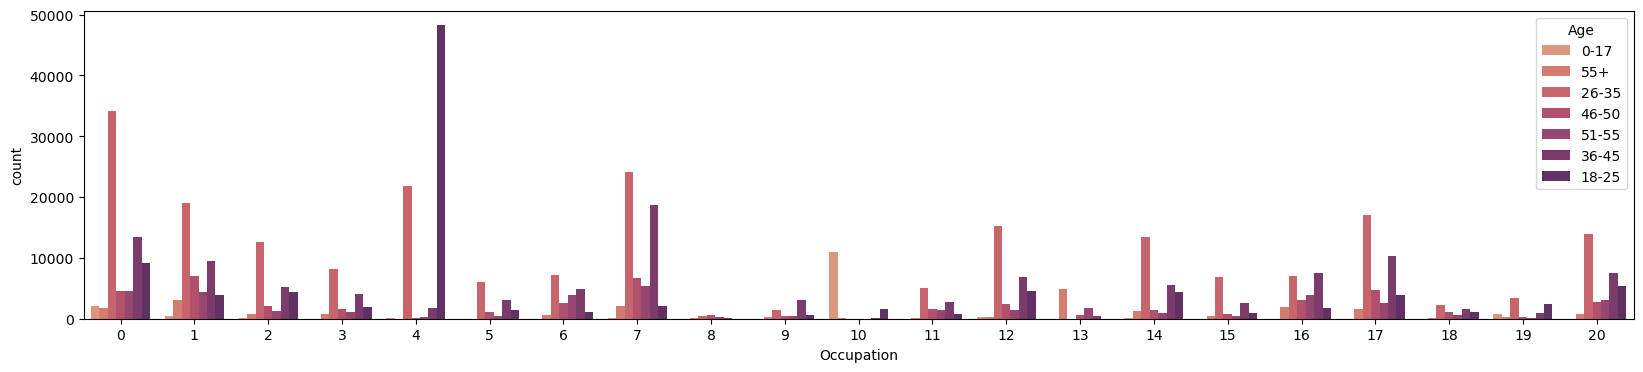

In [19]:
plt.figure(figsize=(20,4))
sns.countplot(x=df['Occupation'],hue=df['Age'],palette='flare')
plt.show()

In [20]:
df1 = pd.DataFrame(df.groupby(['Gender','Occupation','Marital_Status'])['Purchase'].sum()).reset_index()
df2 = pd.DataFrame(df.groupby(['Gender','Occupation','Marital_Status'])['Purchase'].mean()).reset_index()
df3 = pd.DataFrame(df.groupby(['Gender','Occupation','Marital_Status'])['Purchase'].median()).reset_index()

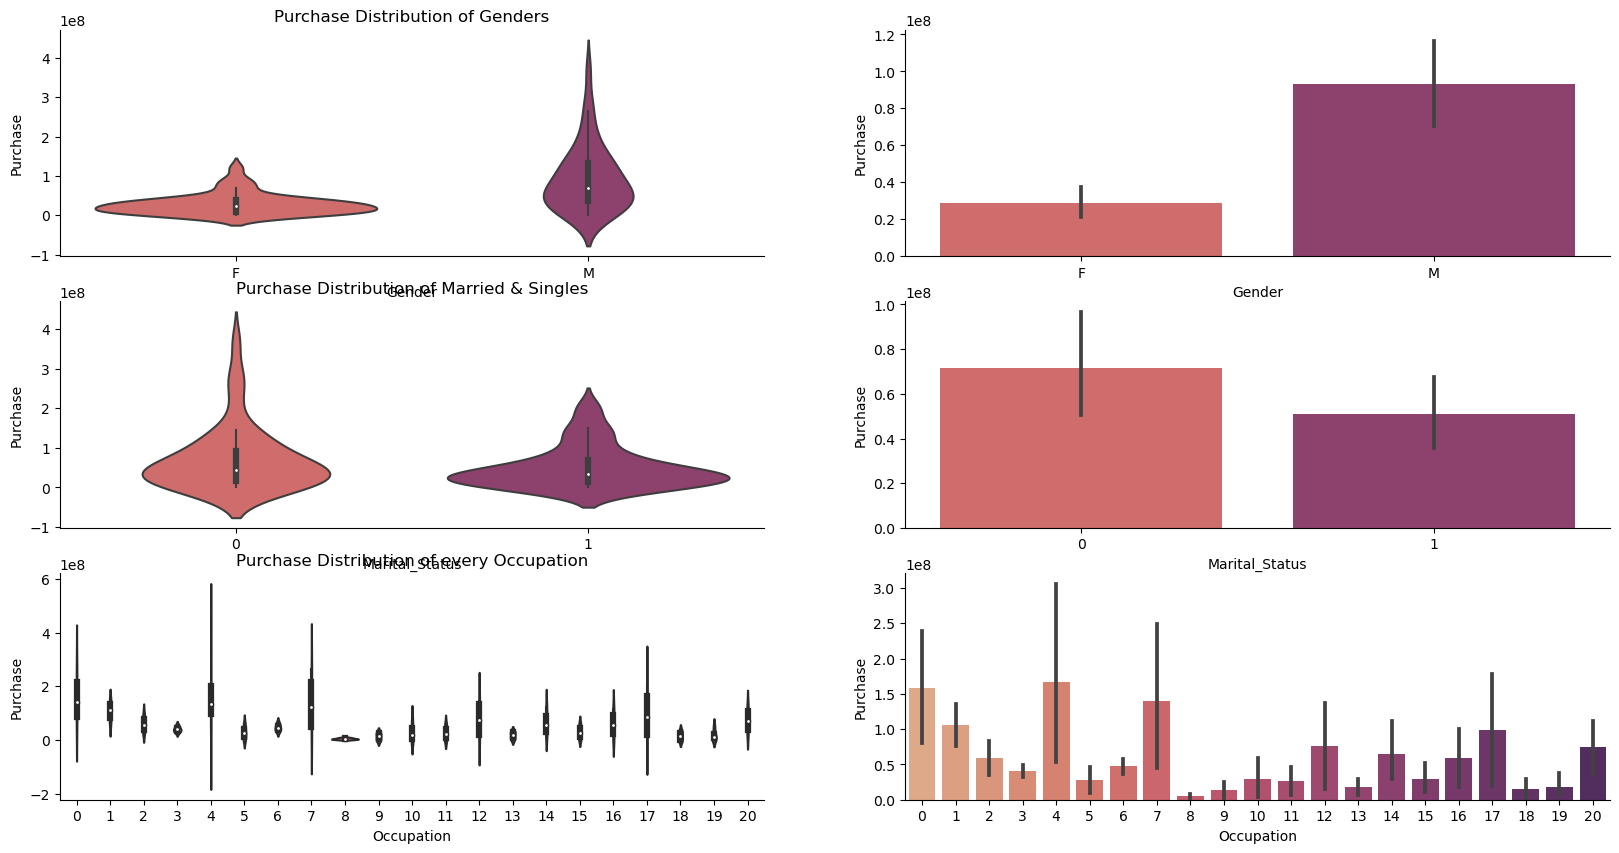

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
sns.violinplot(x=df1['Gender'],y=df1['Purchase'],palette='flare')
plt.title("Purchase Distribution of Genders")
plt.subplot(3,2,2)
sns.barplot(x=df1['Gender'],y=df1['Purchase'],palette='flare')
plt.subplot(3,2,3)
sns.violinplot(x=df1['Marital_Status'],y=df1['Purchase'],palette='flare')
plt.title("Purchase Distribution of Married & Singles")
plt.subplot(3,2,4)
sns.barplot(x=df1['Marital_Status'],y=df1['Purchase'],palette='flare')
plt.subplot(3,2,5)
sns.violinplot(x=df1['Occupation'],y=df1['Purchase'],palette='flare')
plt.title("Purchase Distribution of every Occupation")
plt.subplot(3,2,6)
sns.barplot(x=df1['Occupation'],y=df1['Purchase'],palette='flare')

sns.despine()
plt.show()
# df1.sort_values('Occupation',ascending = False))

`Observations/ Insights:`
* Purchasing pattern of both Genders and Married-Single population is following a poisson distribution.
* Females have a spent a total of 200 million in purchases and males  purchases have gone upto 900 million as 75% of the population is male.
* Purchasing total of unmarried/single population is  about 700 million wheares Married population purchases goes nerby 500 million.
* Only Occupation 4 & Occupation 0 has crossed the purchasing of 150 millions and Occupation 1 & 17 has reached upto 100 million.

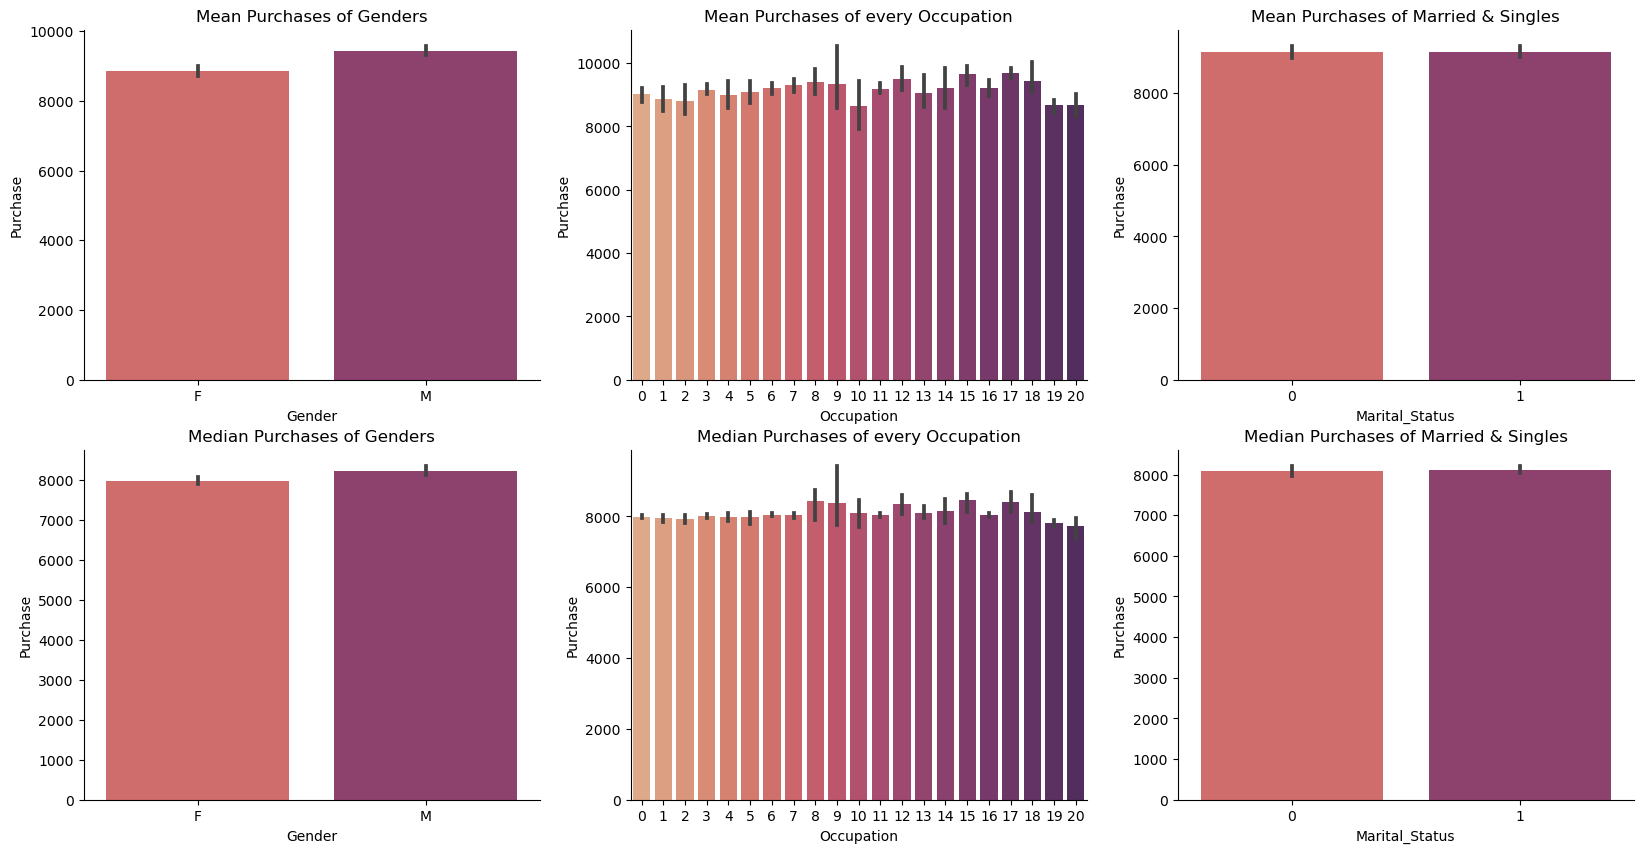

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.barplot(x=df2['Gender'],y=df2['Purchase'],palette='flare')
plt.title("Mean Purchases of Genders")
plt.subplot(2,3,2)
sns.barplot(x=df2['Occupation'],y=df2['Purchase'],palette='flare')
plt.title("Mean Purchases of every Occupation")
plt.subplot(2,3,3)
sns.barplot(x=df2['Marital_Status'],y=df2['Purchase'],palette='flare')
plt.title("Mean Purchases of Married & Singles")
plt.subplot(2,3,4)
sns.barplot(x=df3['Gender'],y=df3['Purchase'],palette='flare')
plt.title("Median Purchases of Genders")
plt.subplot(2,3,5)
sns.barplot(x=df3['Occupation'],y=df3['Purchase'],palette='flare')
plt.title("Median Purchases of every Occupation")
plt.subplot(2,3,6)
sns.barplot(x=df3['Marital_Status'],y=df3['Purchase'],palette='flare')
plt.title("Median Purchases of Married & Singles")
sns.despine()
plt.show()

`Observations/ Insights:`
* Mean and median of Maried-Single seems to be equal.
* Mean and median of Females are less than Males in context with Purchases.

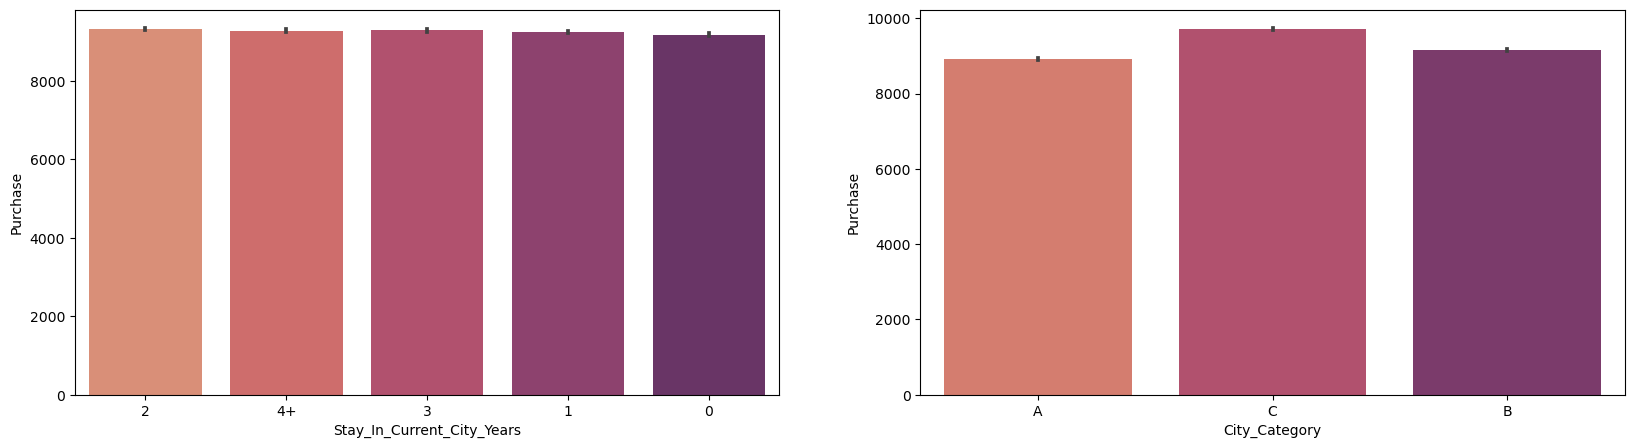

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x=df['Stay_In_Current_City_Years'],y=df['Purchase'],palette='flare')
plt.subplot(1,2,2)
sns.barplot(x=df['City_Category'],y=df['Purchase'],palette='flare')
plt.show()

In [24]:
df_categorical = df.copy(deep=True)
df_categorical['Gender'] = df_categorical['Gender'].replace({'M': 1, 'F': 0})
df_categorical['City_Category']= df_categorical['City_Category'].replace({'A': 1, 'B': 2,'C':3})
df_categorical['Stay_In_Current_City_Years'] = df_categorical['Stay_In_Current_City_Years'].replace({'0':0,'1': 1, '2': 2,'3':3,'4+':4})

In [25]:
df_categorical.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,0,0-17,10,1,2,0,3,8370
1,1000001,P00248942,0,0-17,10,1,2,0,1,15200
2,1000001,P00087842,0,0-17,10,1,2,0,12,1422
3,1000001,P00085442,0,0-17,10,1,2,0,12,1057
4,1000002,P00285442,1,55+,16,3,4,0,8,7969


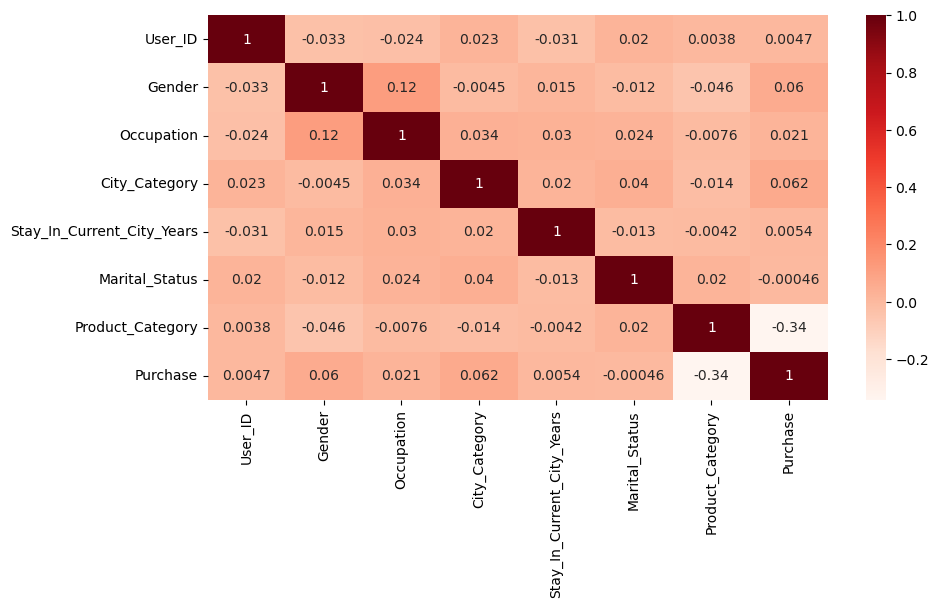

In [26]:
corr= df_categorical.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='Reds')
plt.show()

# `OUTLIER TREATMENT`

In [27]:
male_purchase_q1 = np.percentile(df[df['Gender'] =='M']['Purchase'], 10)
male_purchase_q3 = np.percentile(df[df['Gender'] =='M']['Purchase'], 80)

male_purchase_iqr = male_purchase_q3 - male_purchase_q1
male_purchase_ul = male_purchase_q3 + 1.5*male_purchase_iqr

female_purchase_q1 = np.percentile(df[df['Gender'] == 'F']['Purchase'], 10)
female_purchase_q3 = np.percentile(df[df['Gender'] == 'F']['Purchase'], 80)

female_purchase_iqr = female_purchase_q3 - female_purchase_q1
female_purchase_ul = female_purchase_q3 + 1.5*female_purchase_iqr

df= df[~((df['Gender'] == 'M') & (df['Purchase'] > male_purchase_ul))]
df = df[~((df['Gender'] == 'F') & (df['Purchase'] > female_purchase_ul))]

In [28]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


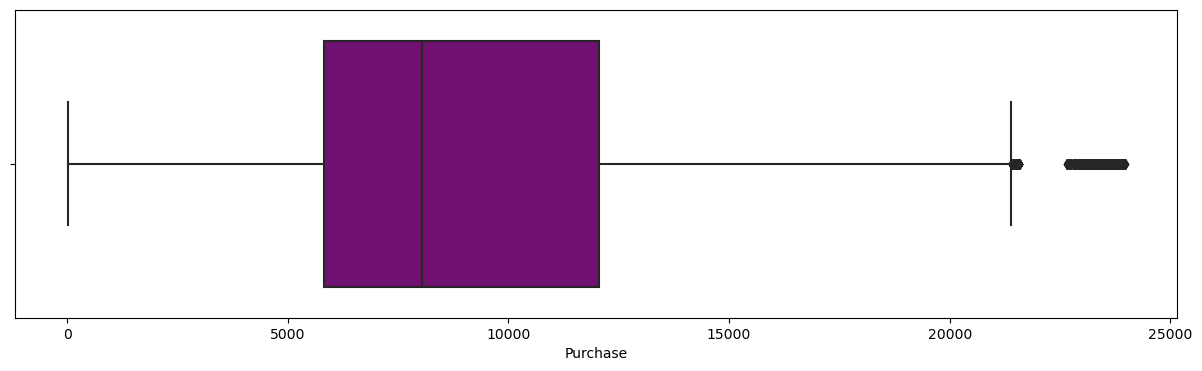

In [29]:
plt.figure(figsize=(15,4))
sns.boxplot(x=df['Purchase'],color='purple')
plt.show()

`It is evident that no outliers are left in the data.`

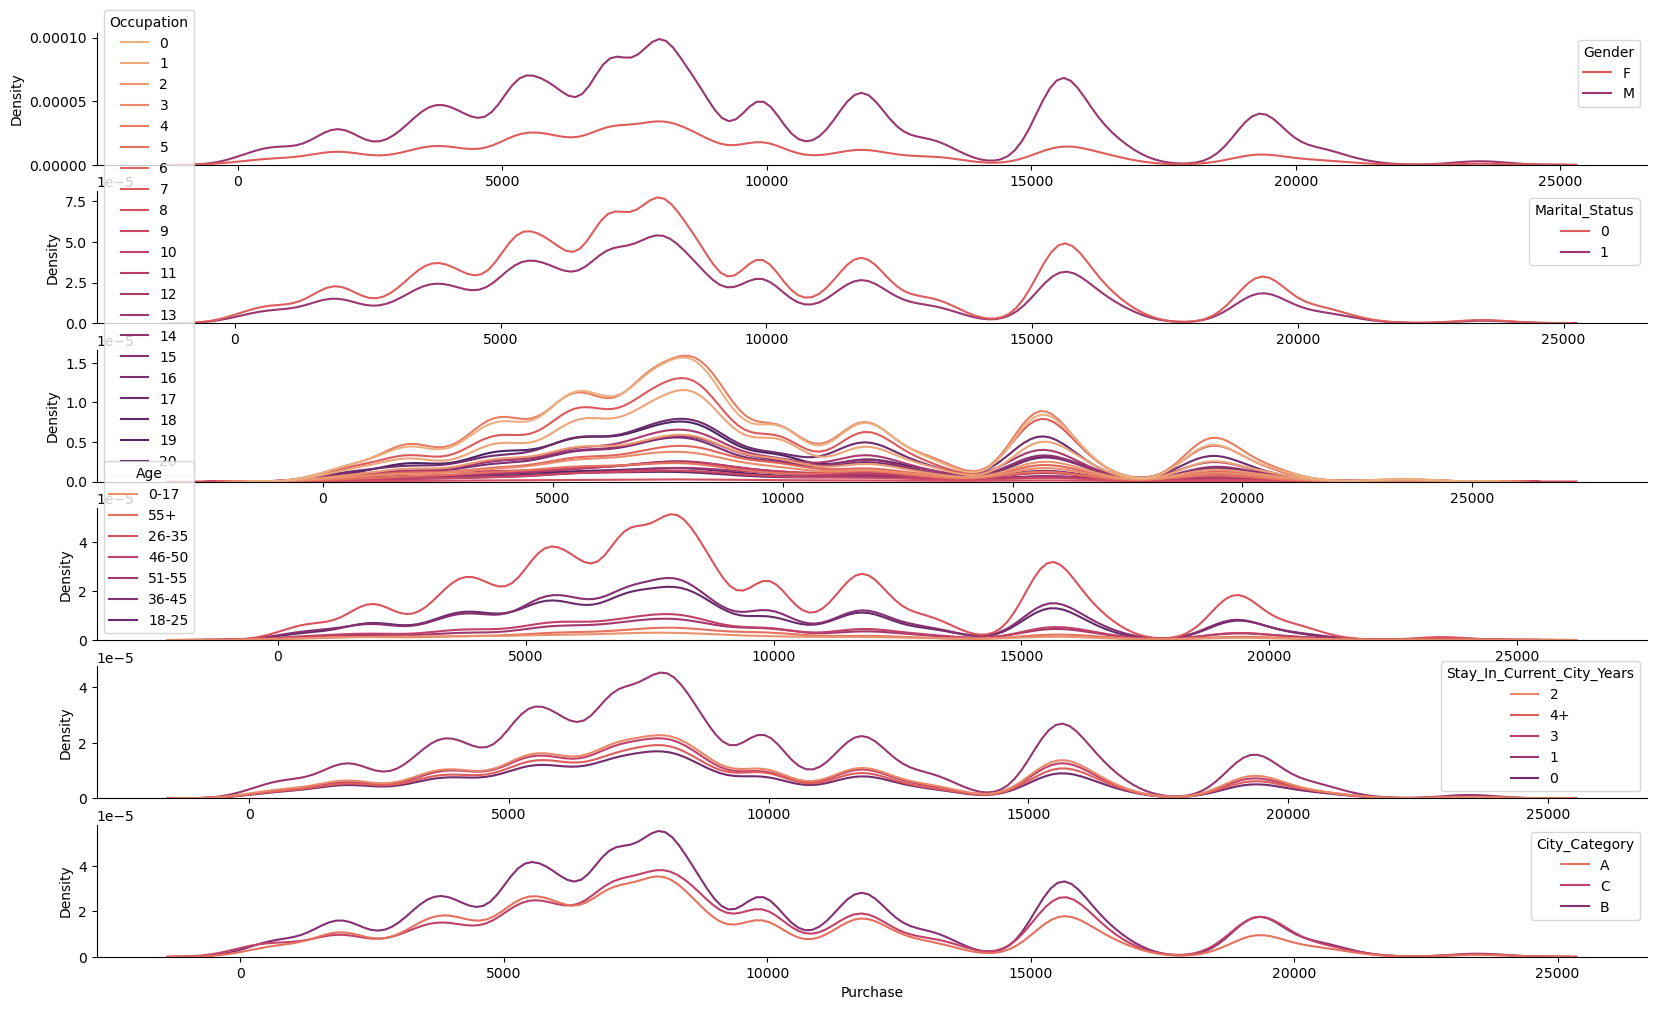

In [30]:
plt.figure(figsize=(20,12))
plt.subplot(6,1,1)
sns.kdeplot(x=df['Purchase'],hue=df['Gender'],palette='flare')
plt.subplot(6,1,2)
sns.kdeplot(x=df['Purchase'],hue=df['Marital_Status'],palette='flare')
plt.subplot(6,1,3)
sns.kdeplot(x=df['Purchase'],hue=df['Occupation'],palette='flare')
plt.subplot(6,1,4)
sns.kdeplot(x=df['Purchase'],hue=df['Age'],palette='flare')
plt.subplot(6,1,5)
sns.kdeplot(x=df['Purchase'],hue=df['Stay_In_Current_City_Years'],palette='flare')
plt.subplot(6,1,6)
sns.kdeplot(x=df['Purchase'],hue=df['City_Category'],palette='flare')
sns.despine()
plt.show()

# `              CONFIDENCE INTERVAL PROCESS AND EXECUTION                    `

In [31]:
male_purchase_data = df[df['Gender'] == 'M']['Purchase']
female_purchase_data = df[df['Gender'] == 'F']['Purchase']

In [32]:
def boot_strap(data, sample_size):
    sample_means = []
    for _ in range(9999):
        sample_data = np.random.choice(data, size=sample_size)
        sample_means.append(sample_data.mean())
    return np.array(sample_means)
def mean_confidence_interval(sample_means, sample_size, confidence_interval):
    mean_sample_means = sample_means.mean()
    std_sample_means = sample_means.std()
    std_err = std_sample_means/np.sqrt(sample_size)
    ll = np.round((mean_sample_means + stats.norm.ppf((1-confidence_interval)/2)*std_err), decimals=2)
    ul = np.round((mean_sample_means + stats.norm.ppf(confidence_interval +(1-confidence_interval)/2)*std_err), decimals=2)
    return ([ll, ul], np.round(std_err, decimals=2))

### `Comparison for Gender:`

In [33]:
male_purchase_bootstrapped = boot_strap(male_purchase_data, 1000)
female_purchase_bootstrapped = boot_strap(female_purchase_data, 1000)

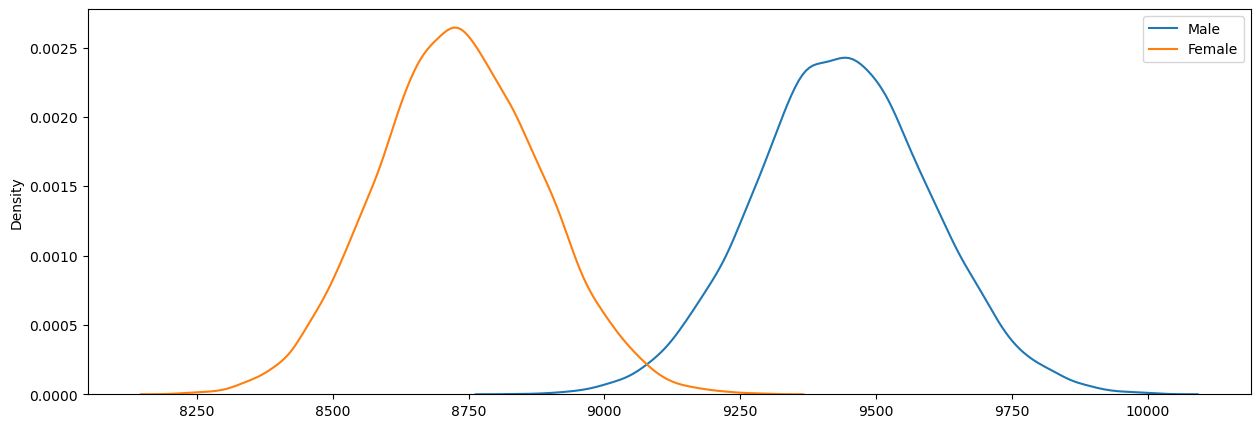

In [34]:
plt.figure(figsize=(15,5))
sns.kdeplot(male_purchase_bootstrapped, label='Male')
sns.kdeplot(female_purchase_bootstrapped,label='Female')
plt.legend()
plt.show()

In [35]:
# confidence interval 90

In [36]:
male_ci_90 = mean_confidence_interval(male_purchase_bootstrapped, 1000, 0.9)
female_ci_90 = mean_confidence_interval(female_purchase_bootstrapped, 1000, 0.9)
print(f'Male Mean Purchase 90% Confidence Interval: {male_ci_90[0]}')
print(f'Female Mean Purchase 90% Confidence Interval: {female_ci_90[0]}')

Male Mean Purchase 90% Confidence Interval: [9429.81, 9446.65]
Female Mean Purchase 90% Confidence Interval: [8726.05, 8741.71]


In [37]:
# confidence interval 95

In [38]:
male_ci_95 = mean_confidence_interval(male_purchase_bootstrapped, 1000, 0.95)
female_ci_95 = mean_confidence_interval(female_purchase_bootstrapped, 1000, 0.95)
print(f'Male Mean Purchase 95% Confidence Interval: {male_ci_95[0]}')
print(f'Female Mean Purchase 95% Confidence Interval: {female_ci_95[0]}')

Male Mean Purchase 95% Confidence Interval: [9428.19, 9448.26]
Female Mean Purchase 95% Confidence Interval: [8724.56, 8743.21]


In [39]:
#confidence interval 99

In [40]:
male_ci_99 = mean_confidence_interval(male_purchase_bootstrapped, 1000, 0.99)
female_ci_99 = mean_confidence_interval(female_purchase_bootstrapped, 1000, 0.99)
print(f'Male Mean Purchase 99% Confidence Interval: {male_ci_99[0]}')
print(f'Female Mean Purchase 99% Confidence Interval: {female_ci_99[0]}')

Male Mean Purchase 99% Confidence Interval: [9425.04, 9451.41]
Female Mean Purchase 99% Confidence Interval: [8721.63, 8746.14]


In [41]:
def plot_confidence_intervals90(dataset):
    lower_values = dataset['lower90']
    upper_values = dataset['upper90']
    y_values = range(len(dataset))
    plt.figure(figsize=(10,2))
    plt.plot([lower_values, upper_values], [y_values, y_values], 'ro-', color='orange')
    plt.title('Confidence Intervals')
    plt.show()
def plot_confidence_intervals95(dataset):
    lower_values = dataset['lower95']
    upper_values = dataset['upper95']
    y_values = range(len(dataset))
    plt.figure(figsize=(10,2))
    plt.plot([lower_values, upper_values], [y_values, y_values], 'ro-', color='blue')
    plt.title('Confidence Intervals')
    plt.show()
def plot_confidence_intervals99(dataset):
    # Calculate the range of confidence intervals
    lower_values = dataset['lower99']
    upper_values = dataset['upper99']
    plt.figure(figsize=(10,2))
    y_values = range(len(dataset))
    plt.plot([lower_values, upper_values], [y_values, y_values], 'ro-', color='red')
    plt.title('Confidence Intervals')
    plt.show()

In [42]:
data_dict = {}
data_dict['Gender'] = ['M','F']
data_dict['lower90'] = [male_ci_90[0][0],female_ci_90[0][0]]
data_dict['upper90'] = [male_ci_90[0][1],female_ci_90[0][1]]
data_dict['lower95'] = [male_ci_95[0][0],female_ci_95[0][0]]
data_dict['upper95'] =[male_ci_95[0][1],female_ci_95[0][1]]
data_dict['lower99'] =[male_ci_99[0][0],female_ci_99[0][0]]
data_dict['upper99'] = [male_ci_99[0][1],female_ci_99[0][1]]

dataset11 = pd.DataFrame(data_dict)
dataset11

,Gender,lower90,upper90,lower95,upper95,lower99,upper99
0,M,9429.81,9446.65,9428.19,9448.26,9425.04,9451.41
1,F,8726.05,8741.71,8724.56,8743.21,8721.63,8746.14


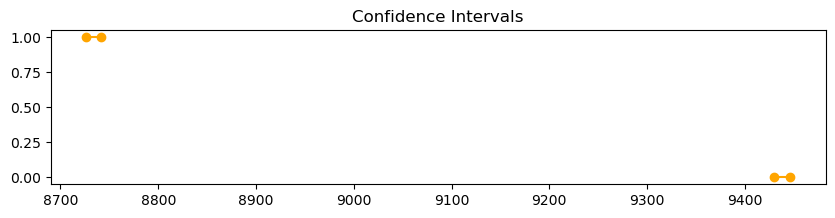

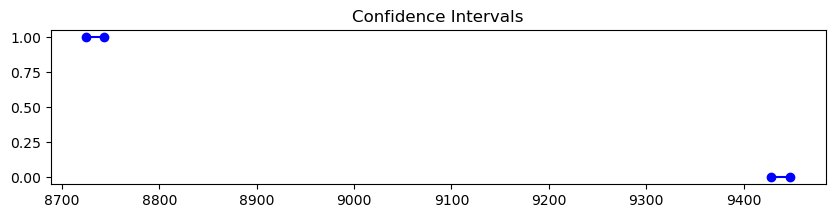

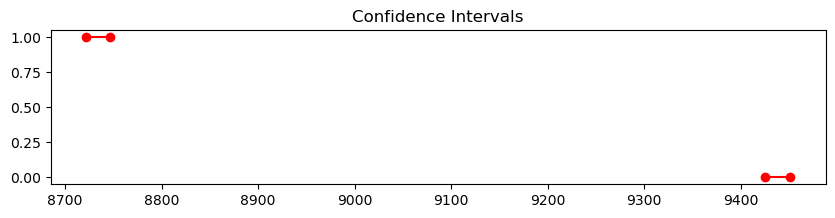

In [43]:
plot_confidence_intervals90(dataset11)
plot_confidence_intervals95(dataset11)
plot_confidence_intervals99(dataset11)

`It’s evident from above graph that the chances of average expenditure/purchase amount for Male and Female being same are infinitesimally small.`

### `Comparison for Marital Status:`

In [44]:
single_purchase_data = df[df['Marital_Status'] == 0]['Purchase']
married_purchase_data = df[df['Marital_Status'] == 1]['Purchase']
single_purchase_bootstrapped = boot_strap(single_purchase_data, 1000)
married_purchase_bootstrapped = boot_strap(married_purchase_data, 1000)

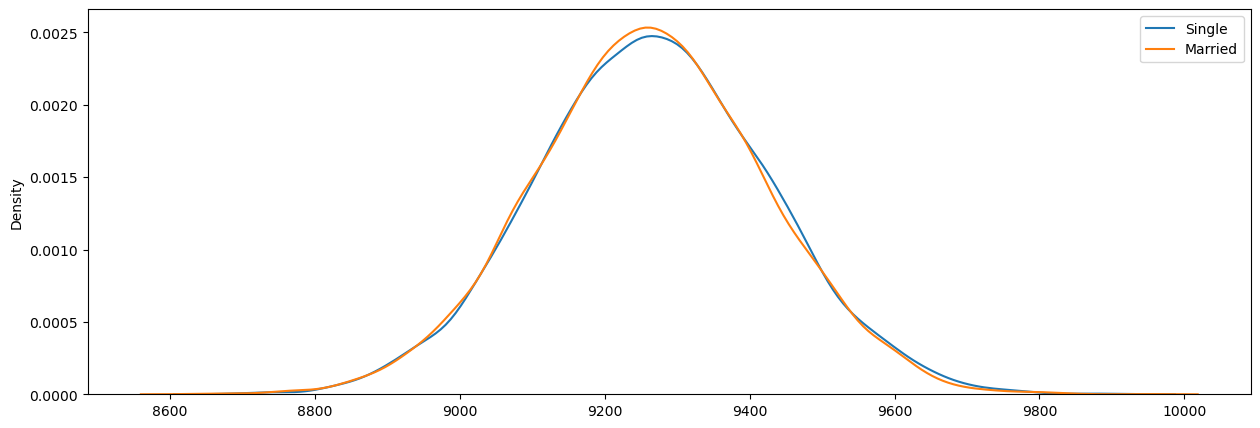

In [45]:
plt.figure(figsize=(15,5))
sns.kdeplot(single_purchase_bootstrapped, label='Single')
sns.kdeplot(married_purchase_bootstrapped,label='Married')
plt.legend()
plt.show()

` It’s evident from above graph that the chances of average expenditure/purchase amount for Singles and Married people being same are pretty high, and they mostly overlap.`

In [46]:
# confidence interval 90

In [47]:
single_ci_90 = mean_confidence_interval(single_purchase_bootstrapped, 1000, 0.9)
married_ci_90 = mean_confidence_interval(married_purchase_bootstrapped, 1000, 0.9)
print(f'Singles Mean Purchase 90% Confidence Interval: {single_ci_90[0]}')
print(f'Married Mean Purchase 90% Confidence Interval: {married_ci_90[0]}')

Singles Mean Purchase 90% Confidence Interval: [9258.4, 9275.11]
Married Mean Purchase 90% Confidence Interval: [9254.09, 9270.62]


In [48]:
# confidence interval 95

In [49]:
single_ci_95 = mean_confidence_interval(single_purchase_bootstrapped, 1000, 0.95)
married_ci_95 = mean_confidence_interval(married_purchase_bootstrapped, 1000, 0.95)
print(f'Singles Mean Purchase 95% Confidence Interval: {single_ci_95[0]}')
print(f'Married Mean Purchase 95% Confidence Interval: {married_ci_95[0]}')

Singles Mean Purchase 95% Confidence Interval: [9256.8, 9276.71]
Married Mean Purchase 95% Confidence Interval: [9252.51, 9272.21]


In [50]:
# confidence interval 99

In [51]:
single_ci_99 = mean_confidence_interval(single_purchase_bootstrapped, 1000, 0.99)
married_ci_99 = mean_confidence_interval(married_purchase_bootstrapped, 1000, 0.99)
print(f'Singles Mean Purchase 99% Confidence Interval: {single_ci_99[0]}')
print(f'Married Mean Purchase 99% Confidence Interval: {married_ci_99[0]}')

Singles Mean Purchase 99% Confidence Interval: [9253.67, 9279.84]
Married Mean Purchase 99% Confidence Interval: [9249.41, 9275.3]


In [52]:
data_dict = {}
data_dict['Marital_Status'] = [1,2]
data_dict['lower90'] = [single_ci_90[0][0],married_ci_90[0][0]]
data_dict['upper90'] = [single_ci_90[0][1],married_ci_90[0][1]]
data_dict['lower95'] = [single_ci_95[0][0],married_ci_95[0][0]]
data_dict['upper95'] =[single_ci_95[0][1],married_ci_95[0][1]]
data_dict['lower99'] =[single_ci_99[0][0],married_ci_99[0][0]]
data_dict['upper99'] = [single_ci_99[0][1],married_ci_99[0][1]]

dataset22 = pd.DataFrame(data_dict)
dataset22

,Marital_Status,lower90,upper90,lower95,upper95,lower99,upper99
0,1,9258.40,9275.11,9256.80,9276.71,9253.67,9279.84
1,2,9254.09,9270.62,9252.51,9272.21,9249.41,9275.30


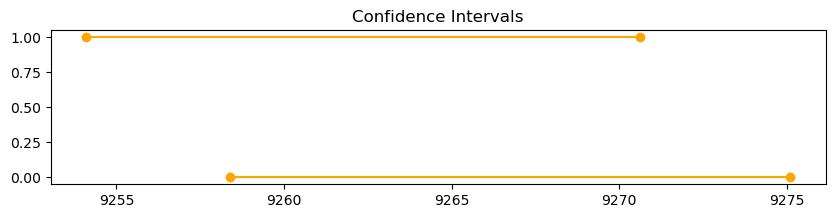

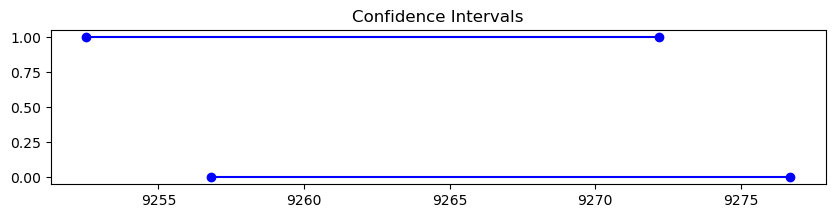

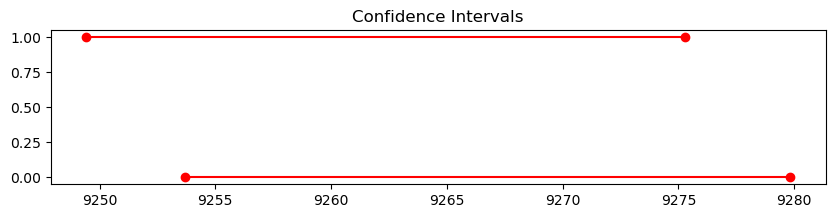

In [53]:
plot_confidence_intervals90(dataset22)
plot_confidence_intervals95(dataset22)
plot_confidence_intervals99(dataset22)

`From the above computed confidence intervals for average purchase amount for Single and Married people, it is very clear that they overlap. We can safely assume with 99% confidence that on an average a Single and Married person would spend somewhere around $9170.`

### `Comparison for Age:`

In [54]:
below_18 = df[df['Age'] == '0-17']['Purchase']
between_18_to_25 = df[df['Age'] == '18-25']['Purchase']
between_26_to_35 = df[df['Age'] == '26-35']['Purchase']
between_36_to_50 = df[(df['Age'] == '36-45') | (df['Age'] == '46-50')]['Purchase']
above_50 = df[(df['Age'] == '51-55') | (df['Age'] == '55+')]['Purchase']

In [55]:
below_18_bootstrapped = boot_strap(below_18, 1000)
between_18_to_25_bootstrapped = boot_strap(between_18_to_25, 1000)
between_26_to_35_bootstrapped = boot_strap(between_26_to_35, 1000)
between_36_to_50_bootstrapped = boot_strap(between_36_to_50, 1000)
above_50_bootstrapped = boot_strap(above_50, 1000)

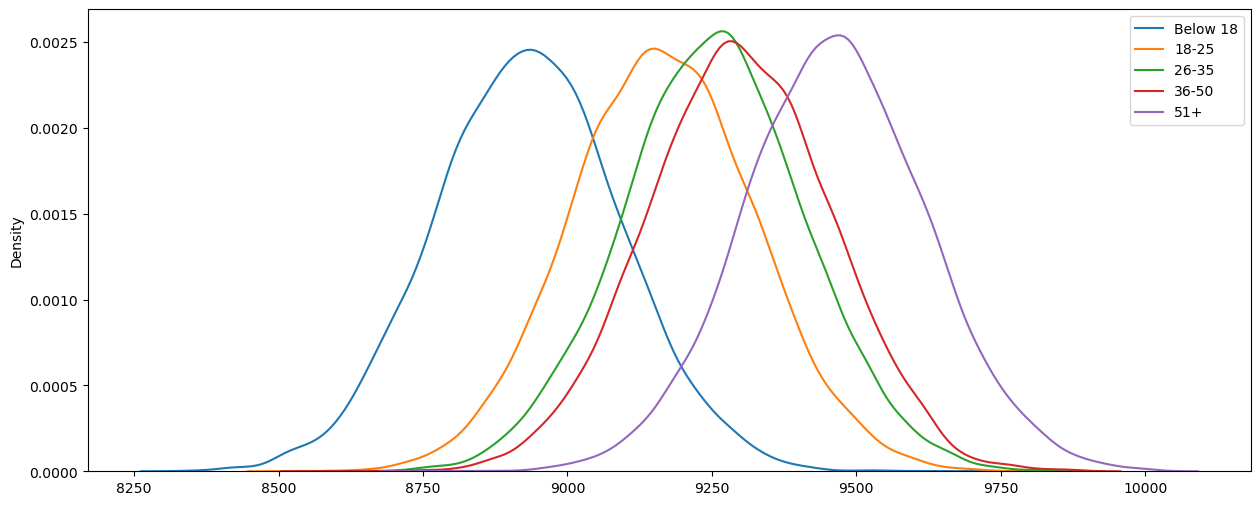

In [56]:
plt.figure(figsize=(15,6))
sns.kdeplot(below_18_bootstrapped, label='Below 18')
sns.kdeplot(between_18_to_25_bootstrapped,label='18-25')
sns.kdeplot(between_26_to_35_bootstrapped,label='26-35')
sns.kdeplot(between_36_to_50_bootstrapped,label='36-50')
sns.kdeplot(above_50_bootstrapped,label='51+')
plt.legend()
plt.show()

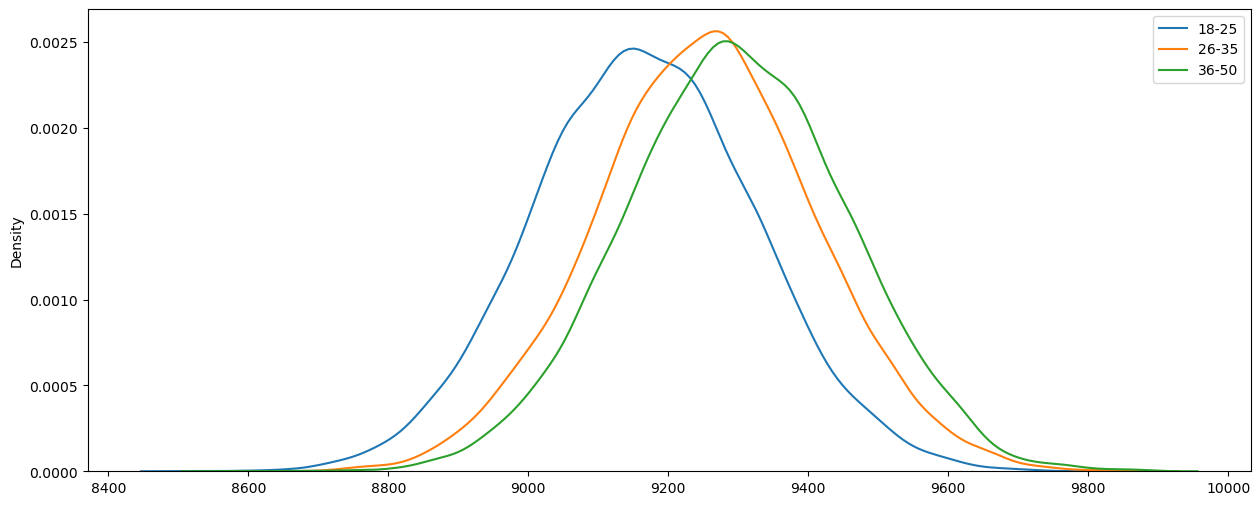

In [57]:
plt.figure(figsize=(15,6))
sns.kdeplot(between_18_to_25_bootstrapped,label='18-25')
sns.kdeplot(between_26_to_35_bootstrapped,label='26-35')
sns.kdeplot(between_36_to_50_bootstrapped,label='36-50')
plt.legend()
plt.show()

`It’s evident from graphs above that the chances of average expenditure/purchase amount for people in the age group 26-50 being same are pretty high, and they mostly overlap, the age group 18-25 also overlaps but not so much for the age group below 18 and above 50.`

In [58]:
# confidence interval 90

In [59]:
below_18_90 = mean_confidence_interval(below_18_bootstrapped, 1000, 0.9)
between_18_to_25_90 = mean_confidence_interval(between_18_to_25_bootstrapped,1000, 0.9)
between_26_to_35_90 = mean_confidence_interval(between_26_to_35_bootstrapped,1000, 0.9)
between_36_to_50_90 = mean_confidence_interval(between_36_to_50_bootstrapped,1000, 0.9)
above_50_90 = mean_confidence_interval(above_50_bootstrapped, 1000, 0.9)

In [60]:
print(f'Below 18 Mean Purchase 90% Confidence Interval: {below_18_90[0]}')
print(f'18 to 25 Mean Purchase 90% Confidence Interval: {between_18_to_25_90[0]}')
print(f'26 to 35 Mean Purchase 90% Confidence Interval: {between_26_to_35_90[0]}')
print(f'36 to 50 Mean Purchase 90% Confidence Interval: {between_36_to_50_90[0]}')
print(f'Above 50 Mean Purchase 90% Confidence Interval: {above_50_90[0]}')

Below 18 Mean Purchase 90% Confidence Interval: [8921.94, 8938.68]
18 to 25 Mean Purchase 90% Confidence Interval: [9156.99, 9173.55]
26 to 35 Mean Purchase 90% Confidence Interval: [9244.7, 9261.14]
36 to 50 Mean Purchase 90% Confidence Interval: [9289.14, 9305.67]
Above 50 Mean Purchase 90% Confidence Interval: [9455.02, 9471.56]


In [61]:
# confidence interval 95

In [62]:
below_18_95 = mean_confidence_interval(below_18_bootstrapped, 1000, 0.95)
between_18_to_25_95 = mean_confidence_interval(between_18_to_25_bootstrapped, 1000, 0.95)
between_26_to_35_95 = mean_confidence_interval(between_26_to_35_bootstrapped,1000, 0.95)
between_36_to_50_95 = mean_confidence_interval(between_36_to_50_bootstrapped,1000, 0.95)
above_50_95 = mean_confidence_interval(above_50_bootstrapped, 1000, 0.95)

In [63]:
print(f'Below 18 Mean Purchase 95% Confidence Interval: {below_18_95[0]}')
print(f'18 to 25 Mean Purchase 95% Confidence Interval:{between_18_to_25_95[0]}')
print(f'26 to 35 Mean Purchase 95% Confidence Interval:{between_26_to_35_95[0]}')

Below 18 Mean Purchase 95% Confidence Interval: [8920.34, 8940.29]
18 to 25 Mean Purchase 95% Confidence Interval:[9155.4, 9175.13]
26 to 35 Mean Purchase 95% Confidence Interval:[9243.12, 9262.71]


In [64]:
# confidence interval 99

In [65]:
below_18_99 = mean_confidence_interval(below_18_bootstrapped, 1000, 0.99)
between_18_to_25_99 = mean_confidence_interval(between_18_to_25_bootstrapped,1000, 0.99)
between_26_to_35_99 = mean_confidence_interval(between_26_to_35_bootstrapped,1000, 0.99)
between_36_to_50_99 = mean_confidence_interval(between_36_to_50_bootstrapped,1000, 0.99)
above_50_99 = mean_confidence_interval(above_50_bootstrapped, 1000, 0.99)

In [66]:
print(f'Below 18 Mean Purchase 99% Confidence Interval: {below_18_99[0]}')
print(f'18 to 25 Mean Purchase 99% Confidence Interval:{between_18_to_25_99[0]}')
print(f'26 to 35 Mean Purchase 99% Confidence Interval:{between_26_to_35_99[0]}')
print(f'36 to 50 Mean Purchase 99% Confidence Interval:{between_36_to_50_99[0]}')
print(f'Above 50 Mean Purchase 99% Confidence Interval: {above_50_99[0]}')

Below 18 Mean Purchase 99% Confidence Interval: [8917.2, 8943.42]
18 to 25 Mean Purchase 99% Confidence Interval:[9152.3, 9178.23]
26 to 35 Mean Purchase 99% Confidence Interval:[9240.04, 9265.79]
36 to 50 Mean Purchase 99% Confidence Interval:[9284.46, 9310.35]
Above 50 Mean Purchase 99% Confidence Interval: [9450.34, 9476.24]


In [67]:
data_dict = {}
data_dict['Age'] = ['<18','18-25','26-35','35-50','>50']
data_dict['lower90'] = [below_18_90[0][0],between_18_to_25_90[0][0],between_26_to_35_90[0][0],between_36_to_50_90[0][0],above_50_90[0][0]]
data_dict['upper90'] = [below_18_90[0][1],between_18_to_25_90[0][1],between_26_to_35_90[0][1],between_36_to_50_90[0][1],above_50_90[0][1]]
data_dict['lower95'] = [below_18_95[0][0],between_18_to_25_95[0][0],between_26_to_35_95[0][0],between_36_to_50_95[0][0],above_50_95[0][0]]
data_dict['upper95'] = [below_18_95[0][1],between_18_to_25_95[0][1],between_26_to_35_95[0][1],between_36_to_50_95[0][1],above_50_95[0][1]]
data_dict['lower99'] = [below_18_99[0][0],between_18_to_25_99[0][0],between_26_to_35_99[0][0],between_36_to_50_99[0][0],above_50_99[0][0]]
data_dict['upper99'] = [below_18_99[0][1],between_18_to_25_99[0][1],between_26_to_35_99[0][1],between_36_to_50_99[0][1],above_50_99[0][1]]
dataset33 = pd.DataFrame(data_dict)
dataset33

,Age,lower90,upper90,lower95,upper95,lower99,upper99
0,<18,8921.94,8938.68,8920.34,8940.29,8917.20,8943.42
1,18-25,9156.99,9173.55,9155.40,9175.13,9152.30,9178.23
2,26-35,9244.70,9261.14,9243.12,9262.71,9240.04,9265.79
3,35-50,9289.14,9305.67,9287.56,9307.25,9284.46,9310.35
4,>50,9455.02,9471.56,9453.43,9473.14,9450.34,9476.24


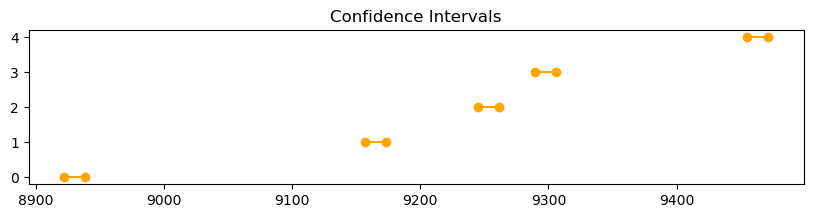

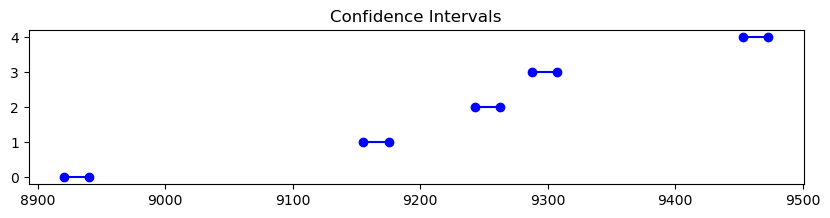

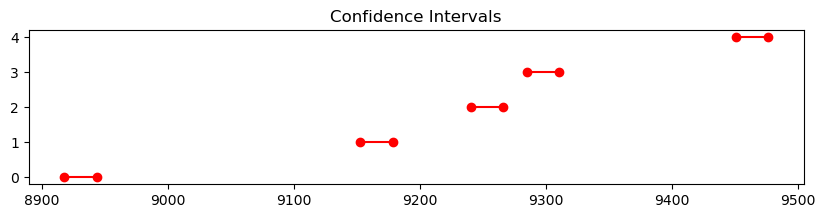

In [68]:
plot_confidence_intervals90(dataset33)
plot_confidence_intervals95(dataset33)
plot_confidence_intervals99(dataset33)

`From the above computed confidence intervals for average purchase amount for various age groups, it is very clear that the average purchase amount for the age groups 26-35 & 36-50 overlap to a large extent.
So, We can safely assume with 99% confidence that on an average a person in the age group 26-50 would spend somewhere around $9200- $9300.`

### `Comparison for City Categories:`

In [69]:
cityA =df[df['City_Category'] == 'A']['Purchase']
cityB =df[df['City_Category'] == 'B']['Purchase']
cityC = df[df['City_Category'] == 'C']['Purchase']

In [70]:
cityA_bootstrapped = boot_strap(cityA, 1000)
cityB_bootstrapped = boot_strap(cityB, 1000)
cityC_bootstrapped = boot_strap(cityC, 1000)

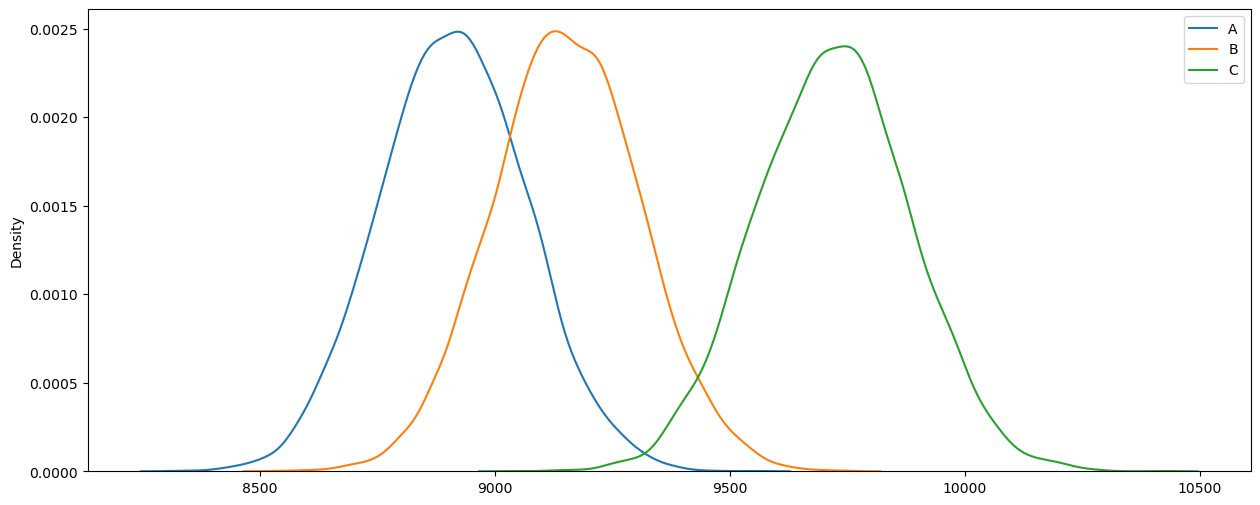

In [71]:
plt.figure(figsize=(15,6))
sns.kdeplot(cityA_bootstrapped,label='A')
sns.kdeplot(cityB_bootstrapped,label='B')
sns.kdeplot(cityC_bootstrapped,label='C')
plt.legend()
plt.show()

In [72]:
# confidence interval at 90

In [73]:
cityA_90 = mean_confidence_interval(cityA_bootstrapped, 1000, 0.9)
cityB_90 = mean_confidence_interval(cityB_bootstrapped,1000, 0.9)
cityC_90 = mean_confidence_interval(cityC_bootstrapped,1000, 0.9)

In [74]:
print(f'City Category A Mean Purchase 90% Confidence Interval: {cityA_90[0]}')
print(f'City Category B Mean Purchase 90% Confidence Interval:{cityB_90[0]}')
print(f'City Category C Mean Purchase 90% Confidence Interval:{cityC_90[0]}')

City Category A Mean Purchase 90% Confidence Interval: [8904.02, 8920.21]
City Category B Mean Purchase 90% Confidence Interval:[9144.64, 9160.89]
City Category C Mean Purchase 90% Confidence Interval:[9711.74, 9728.78]


In [75]:
# confidence interval at 95

In [76]:
cityA_95 = mean_confidence_interval(cityA_bootstrapped, 1000, 0.95)
cityB_95 = mean_confidence_interval(cityB_bootstrapped,1000, 0.95)
cityC_95 = mean_confidence_interval(cityC_bootstrapped,1000, 0.95)

In [77]:
print(f'City Category A Mean Purchase 95% Confidence Interval: {cityA_95[0]}')
print(f'City Category B Mean Purchase 95% Confidence Interval:{cityB_95[0]}')
print(f'City Category C Mean Purchase 95% Confidence Interval:{cityC_95[0]}')

City Category A Mean Purchase 95% Confidence Interval: [8902.47, 8921.76]
City Category B Mean Purchase 95% Confidence Interval:[9143.08, 9162.44]
City Category C Mean Purchase 95% Confidence Interval:[9710.11, 9730.41]


In [78]:
# confidence interval at 99

In [79]:
cityA_99 = mean_confidence_interval(cityA_bootstrapped, 1000, 0.99)
cityB_99 = mean_confidence_interval(cityB_bootstrapped,1000, 0.99)
cityC_99 = mean_confidence_interval(cityC_bootstrapped,1000, 0.99)

In [80]:
print(f'City Category A Mean Purchase 99% Confidence Interval: {cityA_99[0]}')
print(f'City Category B Mean Purchase 99% Confidence Interval:{cityB_99[0]}')
print(f'City Category C Mean Purchase 99% Confidence Interval:{cityC_99[0]}')

City Category A Mean Purchase 99% Confidence Interval: [8899.44, 8924.79]
City Category B Mean Purchase 99% Confidence Interval:[9140.04, 9165.49]
City Category C Mean Purchase 99% Confidence Interval:[9706.92, 9733.6]


In [81]:
data_dict = {}
data_dict['City_Category'] = ['A','B','C']
data_dict['lower90'] = [cityA_90[0][0],cityB_90[0][0],cityC_90[0][0]]
data_dict['upper90'] = [cityA_90[0][1],cityB_90[0][1],cityC_90[0][1]]
data_dict['lower95'] = [cityA_95[0][0],cityB_95[0][0],cityC_95[0][0]]
data_dict['upper95'] = [cityA_95[0][1],cityB_95[0][1],cityC_95[0][1]]
data_dict['lower99'] = [cityA_99[0][0],cityB_99[0][0],cityC_99[0][0]]
data_dict['upper99'] = [cityA_99[0][1],cityB_99[0][1],cityC_99[0][1]]
dataset44 = pd.DataFrame(data_dict)
dataset44

,City_Category,lower90,upper90,lower95,upper95,lower99,upper99
0,A,8904.02,8920.21,8902.47,8921.76,8899.44,8924.79
1,B,9144.64,9160.89,9143.08,9162.44,9140.04,9165.49
2,C,9711.74,9728.78,9710.11,9730.41,9706.92,9733.60


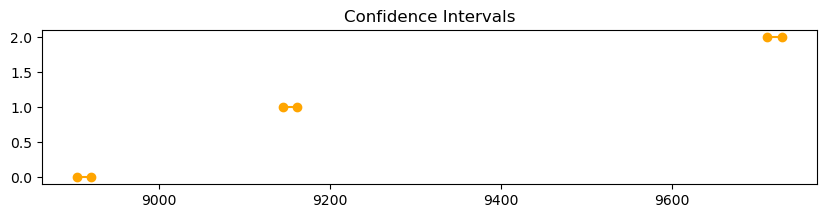

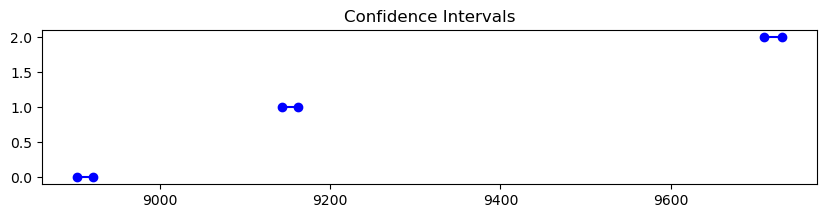

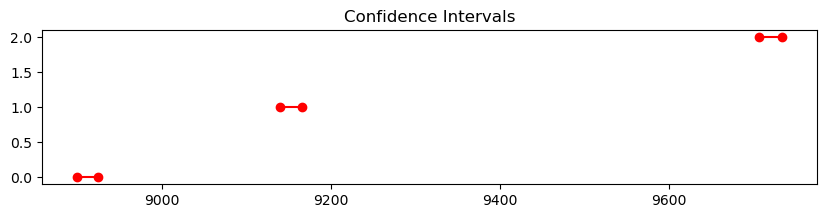

In [82]:
plot_confidence_intervals90(dataset44)
plot_confidence_intervals95(dataset44)
plot_confidence_intervals99(dataset44)

# `                                      INSIGHTS:                                                                   `


* As 24% of the population belongs to women, 58% of them are single and out of 76% of male 59% of them are married.
* Population in Occupation 4, 1, 0 & 7 comprises 33.8% of the Males and 37.4% of Females.
* 53.7% of the people belongs to the city where they have been living for reither 1 or 2 years.
* Occupation 1,7,20 & 17 have a good distribution of all the Age groups yet Occupation 8 has less than 0.02% of the population.
* People of Age group 18-25 i.e., more than 40000 people of the population has opted for Occupation 4.
* Purchasing pattern of both Genders and Married-Single population is following a poisson distribution.
* Females have a spent a total of 200 million in purchases and males  purchases have gone upto 900 million as 75% of the population is male.
* Purchasing total of unmarried/single population is  about 700 million wheares Married population purchases goes nerby 500 million.
* Only Occupation 4 & Occupation 0 has crossed the purchasing of 150 millions and Occupation 1 & 17 has reached upto 100 million.
* Mean and median of Maried-Single seems to be equal.
* Mean and median of Females are less than Males in context with Purchases.
* City category A spends less than City category B and B tends to spend less than C.

# `                        SUBMITTED BY: NOOHI NAAZ                                               `